## Q4. Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm

In [146]:
# Importing important libraries for model building
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [130]:
# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [131]:
# Watching Dataset to interpret the columns
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [132]:
# finding null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [133]:
#importing libraries for basic data visualisation, as the data is very limited, basic EDA is satisfactory.
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

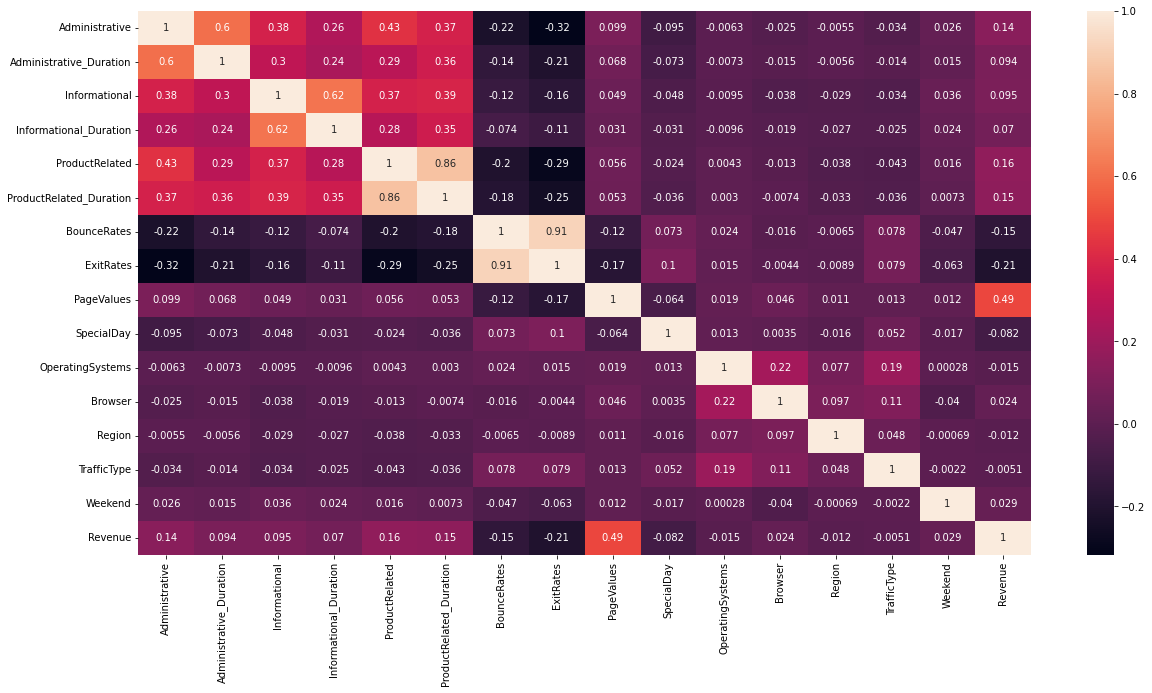

In [134]:
# No Correlation between the features of the dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [135]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['Month', 'VisitorType']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

In [137]:

# Split the data into features and target variables
X = data_encoded.drop(['Revenue', 'Informational_Duration','Weekend'], axis=1)
y = data_encoded[['Revenue', 'Weekend']]
informational_duration = data_encoded['Informational_Duration']

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Initialize ensemble models
model = MultiOutputClassifier(RandomForestClassifier())

# Train the ensemble models
model.fit(X_train,y_train)

# Predict revenue using the ensemble models
pred = model.predict(X_test)

print(classification_report(y_test, pred))
#revenue_pred=pred[:,:0]
#weekend_pred=pred[:,:1]

              precision    recall  f1-score   support

           0       0.75      0.55      0.64       411
           1       0.69      0.11      0.19       620

   micro avg       0.73      0.29      0.41      1031
   macro avg       0.72      0.33      0.41      1031
weighted avg       0.72      0.29      0.37      1031
 samples avg       0.12      0.10      0.11      1031



C:\Users\Hritik Pal\Anaconda3\envs\New project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hritik Pal\Anaconda3\envs\New project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
revenue_pred = pred[:, 0]
weekend_pred = pred[:, 1]

In [141]:
revenue_pred[0]

False

In [142]:

# Find the Informational_Duration
informational_duration_pred = (informational_duration_train.mean() + informational_duration_test.mean()) / 2
print("Mean Informational Duration:", informational_duration_pred)

Mean Informational Duration: 35.08775642910609
